In [32]:
#Original data imported on March 10th, 2020 at 2 pm
import pandas as pd
import numpy as np
import geopandas
import datetime as dt 
import matplotlib.pyplot as plt
from shapely.geometry import shape
pd.__version__
d = pd.read_html('https://www.worldometers.info/coronavirus/')
type(d)
len(d)
df = d[0]
df.rename(columns = {'Country,Other':'Country'}, inplace = True) 
df_new = df[['Country', 'NewCases']]
df_new.set_index('Country', inplace=True)
df_cases = df_new.drop(['Diamond Princess','Total:'])
# reps = {'+':'', ',': ''}
# df_cases['NewCases'] = df_cases['NewCases'].str.translate(str.maketrans(reps))
# df_cases['NewCases'] = df_cases['NewCases'].astype(float)
df_cases = df_cases.fillna(0)

df_cases

,NewCases
Country,
China,26.0
Italy,977.0
Iran,881.0
S. Korea,35.0
France,372.0
...,...
Liechtenstein,0.0
Mongolia,1.0
Panama,1.0


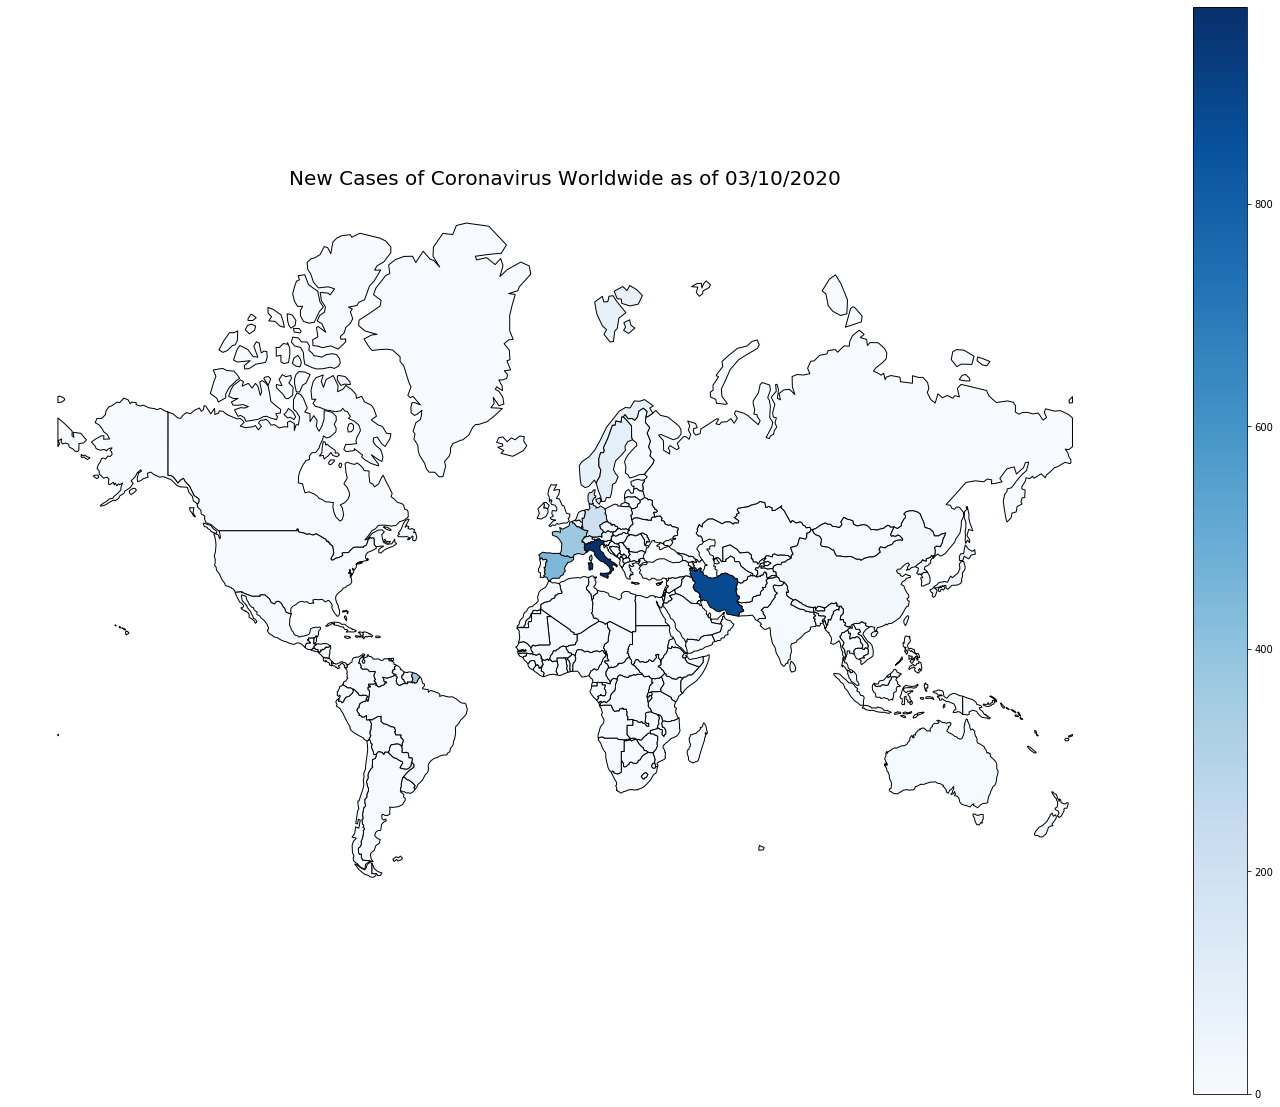

In [33]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=3395)
world = world.drop(world.index[159])
merged = world.set_index('name').join(df_cases)
merged['NewCases'] = merged['NewCases'].fillna(0)
ax = merged.plot(column='NewCases', cmap = 'Blues', legend = True, figsize=(25,20), edgecolor = 'black')
date = dt.datetime.today().strftime("%m/%d/%Y")
ax.set_title('New Cases of Coronavirus Worldwide as of ' + date, fontdict={'fontsize': 20}, loc='center')
ax.set_axis_off()